In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from modelval import pairptl, network, trainer, dataset, kernel
from modelval.ArbDataGen import arb_w_gen

% matplotlib inline
%load_ext autoreload
    
%autoreload 2

In [24]:
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')

In [25]:
data_stdp = data[data['ptl_idx'].isin([1,2,3,4])]

In [26]:
data_stdp['train_len'].max()

KeyError: 'train_len'

In [ ]:
data_stdp.head()

In [ ]:
data_stdp = data[data['ptl_idx']==1]
plt.plot(data_stdp['dt1'], data_stdp['dw_mean'], 'o')

AttributeError: 'KernelGen' object has no attribute 'bilat_ker'

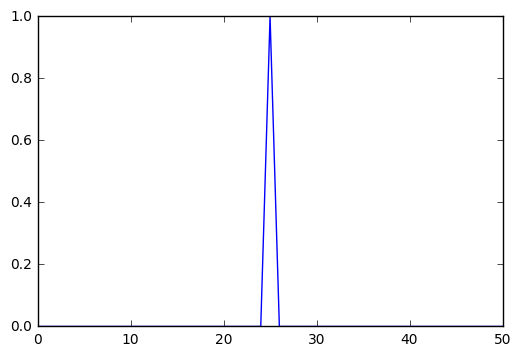

In [27]:
kernel_test = kernel.KernelGen()
plt.plot(kernel_test.dot_ker)
plt.plot(kernel_test.bilat_ker)

In [28]:
with tf.Graph().as_default():
    
    x = tf.placeholder(shape=[51,1], dtype=tf.float32)
    kernel = tf.placeholder(shape=[51, 1], dtype=tf.float32)
    
    x_exp = tf.expand_dims(x, 0)
    kernel_exp = tf.expand_dims(kernel, 2)
    y = tf.squeeze(tf.nn.conv1d(value=x_exp, filters=kernel_exp, stride=1, padding='SAME'))
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        
        x_out, y_out = sess.run([x, y], feed_dict={x: kernel_test.dot_ker, kernel: kernel_test.bilat_ker})
        
plt.plot(x_out)
plt.plot(y_out)

AttributeError: 'KernelGen' object has no attribute 'bilat_ker'

Test the convolution effect

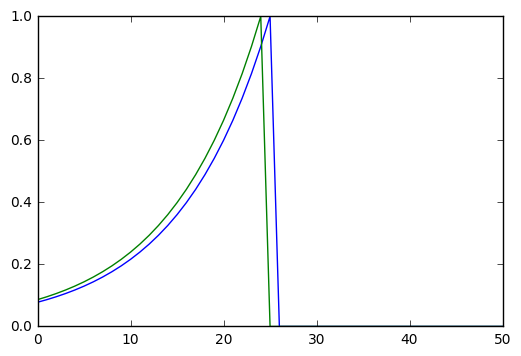

In [6]:
# Create a one side exponential kernel
ker_test = kernel.KernelGen()
kernel_uni = ker_test.uni_exp_ker(side='left')
kernel_uni_shift = ker_test.uni_exp_ker(if_shift=True,side='left')

plt.plot(kernel_uni)
plt.plot(kernel_uni_shift)

In [11]:
# generate a spike train
spk_test = np.zeros((100,1))
spk_test[20] = 1
spk_test[30] = 1

In [17]:
# Convolve and see the results
with tf.Graph().as_default():
    x = tf.expand_dims(tf.cast(spk_test, tf.float32), axis=0)
    kernel = tf.expand_dims(tf.cast(kernel_uni, tf.float32), axis=1)
    y = tf.nn.conv1d(value=x, filters=kernel, stride=1, padding='SAME')
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        output = sess.run(y)

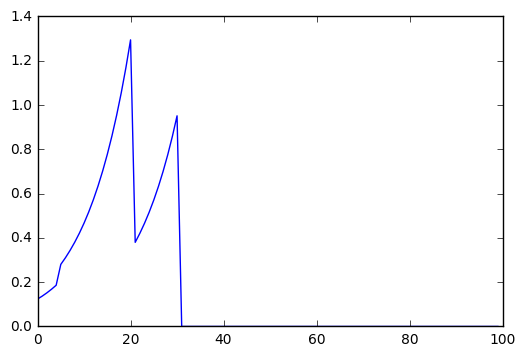

In [21]:
plt.plot(np.squeeze(output))